# Проектная работа
## Описание работы
В данной работе нам предоставили данные о гипотезах, заказах и визитах на сайт двух групп A/B тестирования. Нам предстоит провести приоритиацию гипотез и провести анализ A/B тестирования
###  План работы
#### Часть 1. Приоритезация гипотез:
* <a href="#1.1">[1. Импортируем библиотеки.]</a>
* <a href="#1.2">[2. Открываем и изучаем таблицу.]</a>
* <a href="#1.3">[3. Считаем ICE.]</a>
* <a href="#1.4">[4. Считаем RICE.]</a>

#### Часть 2. Анализ A/B-теста
* <a href="#2.1">[1. Открываем и изучаем данные.]</a>
* <a href="#2.2">[2. График кумулятивной выручки по группам.]</a>
* <a href="#2.3">[3. График кумулятивного среднего чека по группам.]</a>
* <a href="#2.4">[4. График относительного изменения кумулятивного среднего чека группы B к группе A.]</a>
* <a href="#2.5">[5. График кумулятивной конверсии по группам.]</a>
* <a href="#2.6">[6. График относительного изменения кумулятивной конверсии группы B к группе A.]</a>
* <a href="#2.7">[7. Точечный график количества заказов по пользователям.]</a>
* <a href="#2.8">[8. Точечный график стоимостей заказов.]</a>
* <a href="#2.9">[9. Статистическая значимость различий в конверсии между группами по «сырым» данным.]</a>
* <a href="#2.10">[10. Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.]</a>
* <a href="#2.11">[11. Статистическая значимость различий в конверсии между группами по «очищенным» данным.]</a>
* <a href="#2.12">[12.  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.]</a>

#### Вывод
* <a href="#3">[Вывод]</a>

## Часть 1. Приоритезация гипотез
### Импортируем библиотеки<a name="1.1"></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

### Открываем и изучаем таблицу<a name="1.2"></a>

In [2]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')


In [3]:
print(hypothesis.info(),'\n')
hypothesis.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None 



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


### Считаем ICE<a name="1.3"></a>

Метод определения приоритетов ICE был придуман Шоном Эллисом, который известен авторством термина Growth Hacker.

Первоначально ICE был предназначен для приоритизации экспериментов по росту. Позже ICE стали использовать и для приоритизации фичей. ICE включает 3 фактора
- Impact — влияние
- Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат
- Effort — трудозатраты (Ease-легкость реализации) 

In [4]:
hypothesis['ICE']=hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis=hypothesis.sort_values('ICE',ascending= False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


### Считаем RICE<a name="1.4"></a>

RICE — это метод приоритизации идей и фич продукта. Аббревиатура включает 4 фактора, которые менеджер продукта может смело использовать для оценки и приоритизации продуктовых фич:

- Reach — это охват
- Impact — влияние
- Confidence — уверенность в вашей оценке охвата, влияния и трудозатрат
- Effort — трудозатраты

In [5]:
hypothesis['RICE']=hypothesis['ICE']*hypothesis['Reach']
hypothesis=hypothesis.sort_values('RICE',ascending= False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### Вывод
Фича может иметь хорошее влияние на пользователя, уверенность в успехе, быть легкой в реализации, но иметь маленький охват. Такая фича будет в топе ICE, но RICE у нее будет меньше. Что мы и наблюдаем с 3 гипотезой. 7 и 0 гипотеза находятся в обоих топах, я бы рекомендовал начать с них.

## Часть 2. Анализ A/B-теста
### Открываем и изучаем данные<a name="2.1"></a>

In [6]:
orders=pd.read_csv('/datasets/orders.csv')

In [7]:
print(orders.info(),'\n')
orders.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors=pd.read_csv('/datasets/visitors.csv')

In [9]:
print(visitors.info(),'\n')
visitors.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 



,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Переведем даты из типа object в datrtime64[ns]

In [10]:
orders['date']=orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date']=visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


In [11]:
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


### График кумулятивной выручки по группам<a name="2.2"></a>

Сделаем таблицу с кумулятивными количеством покупателей, покупок, выручки, посетителей для каждой группы тестирования

In [12]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated=datesGroups.apply(lambda x: orders[np.logical_and(x['group']==orders['group'],orders['date']<=x['date'])]\
                              .agg({'date':'max','group':'max','transactionId':pd.Series.nunique,
                                    'visitorId':pd.Series.nunique,'revenue':'sum'}),axis=1).sort_values(['date','revenue'])



In [13]:
visitsAggregated=visitors.apply(lambda x: visitors[np.logical_and(visitors['group']==x['group'],
                visitors['date']<=x['date'])].agg({'date':'max','group':'max','visitors':'sum'})
                                ,axis=1).sort_values(['date','visitors'])

In [14]:
cumulativeData=ordersAggregated.merge(visitsAggregated,on=['date','group'])
cumulativeData.columns=['date','group','orders','buyers','revenue','visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,B,21,20,101217,713
1,2019-08-01,A,24,20,148579,719
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [15]:
cumulativeDataA=cumulativeData[cumulativeData['group']=='A']
cumulativeDataB=cumulativeData[cumulativeData['group']=='B']

Построим график кумулятивной выручки по группам <a name='graph'></a>

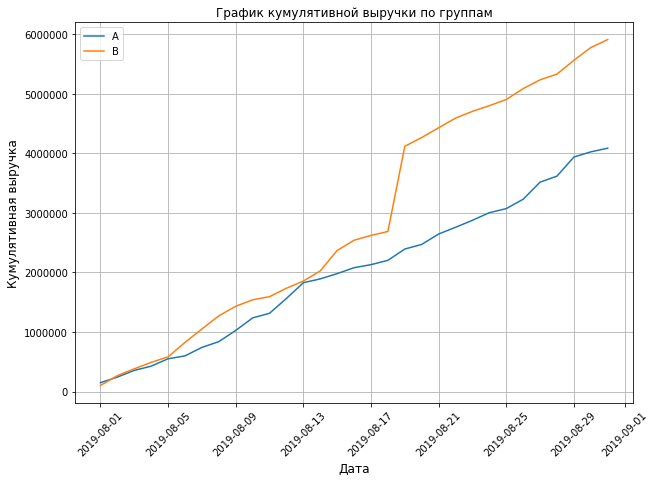

In [16]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Дата', fontsize='large')
plt.ylabel('Кумулятивная выручка', fontsize='large')
plt.title('График кумулятивной выручки по группам', fontsize='large')
plt.show()


У обоих групп кумулятивная выручка растет, однакого наблюдаем резкий рост после 17 августа у группы B. Кто-то совершил крупную покупку (покупки) и это сильно повлияло на график. 

### График кумулятивного среднего чека по группам <a name="2.3"></a>

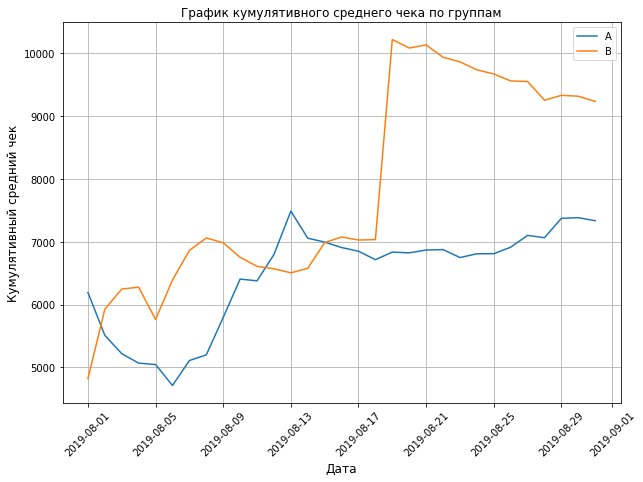

In [17]:
plt.figure(figsize=(10,7))
plt.plot(cumulativeDataA['date'],cumulativeDataA['revenue']/cumulativeDataA['orders'],label='A')
plt.plot(cumulativeDataB['date'],cumulativeDataB['revenue']/cumulativeDataB['orders'],label='B')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.xlabel('Дата', fontsize='large')
plt.ylabel('Кумулятивный средний чек', fontsize='large')
plt.title('График кумулятивного среднего чека по группам', fontsize='large')
plt.show()

Если визуально убрать этот выброс, заметим, что после 15 августа кумулятивный средний чек начал устанавливаться

### График относительного изменения кумулятивного среднего чека группы B к группе A.<a name="2.4"></a>

In [18]:
cumulativeRevenue=cumulativeDataA[['date','orders','revenue']].merge(cumulativeDataB[['date','orders','revenue']],left_on='date',
                                                                 right_on='date',how='left',suffixes=['A','B'])
cumulativeRevenue.head(5)

,date,ordersA,revenueA,ordersB,revenueB
0,2019-08-01,24,148579,21,101217
1,2019-08-02,44,242401,45,266748
2,2019-08-03,68,354874,61,380996
3,2019-08-04,84,425699,78,489567
4,2019-08-05,109,549917,101,581995


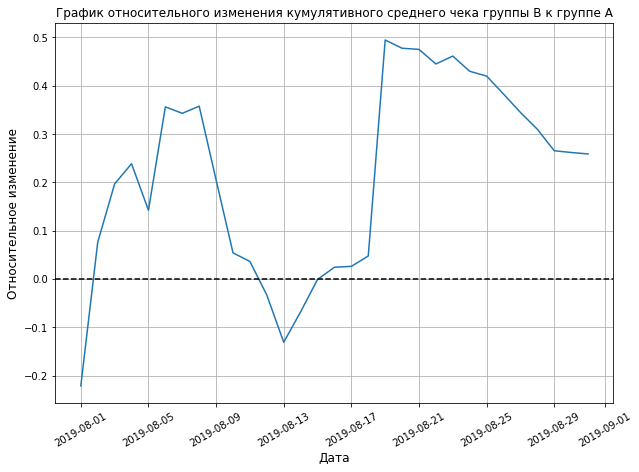

In [19]:
grotizmsrch=plt.figure(figsize=(10,7))
plt.plot(cumulativeRevenue['date'],(cumulativeRevenue['revenueB']/cumulativeRevenue['ordersB'])/
         (cumulativeRevenue['revenueA']/cumulativeRevenue['ordersA'])-1);
plt.xticks(rotation=30)
plt.grid()
plt.xlabel('Дата', fontsize='large')
plt.ylabel('Относительное изменение', fontsize='large')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize='large')
plt.axhline(0,color='black',linestyle='--');

Опять выбросы портят всю картину, по ней нельзя сделать точных выводов

### График кумулятивной конверсии по группам <a name="2.5"></a>

In [20]:
cumulativeData['conversion']=cumulativeData['orders']/cumulativeData['visitors']

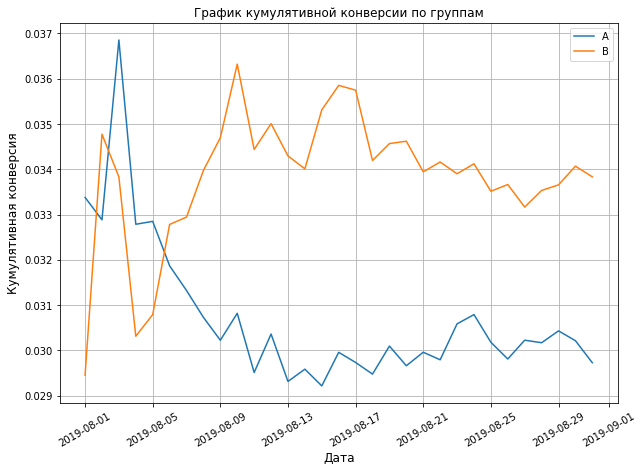

In [21]:
cumulativeConversA=cumulativeData[cumulativeData['group']=='A']
cumulativeConversB=cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(10,7))
plt.plot(cumulativeConversA['date'],cumulativeConversA['conversion'],label='A')
plt.plot(cumulativeConversB['date'],cumulativeConversB['conversion'],label='B')
plt.xticks(rotation=30)
plt.grid()
plt.legend()
plt.xlabel('Дата', fontsize='large')
plt.ylabel('Кумулятивная конверсия', fontsize='large')
plt.title('График кумулятивной конверсии по группам', fontsize='large')
plt.show()

Конверсия B со временем стала лучше и побеждает группу А. Возможно, это результат выбросов

### График относительного изменения кумулятивной конверсии группы B к группе A. <a name="2.6"></a>

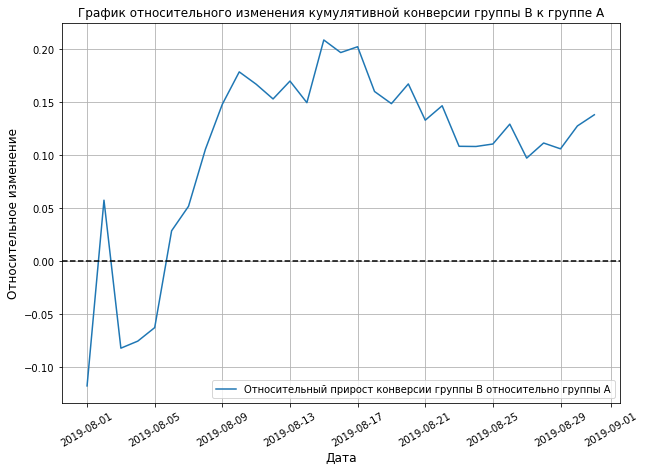

In [22]:
mergedCumulativeConversions = cumulativeConversA[['date','conversion']].merge(cumulativeConversB[['date','conversion']],
                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
grotizmcum=plt.figure(figsize=(10,7))
plt.plot(mergedCumulativeConversions['date'],mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B относительно группы A");
plt.xticks(rotation=30)
plt.grid()
plt.axhline(0,color='black',linestyle='--');
plt.legend()
plt.xlabel('Дата', fontsize='large')
plt.ylabel('Относительное изменение', fontsize='large')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', fontsize='large')
plt.show()

После 8 августа график резко скакнул в сторону B. Возможно, кто-то совершил аномальное количество покупок

### Точечный график количества заказов по пользователям <a name="2.7"></a>

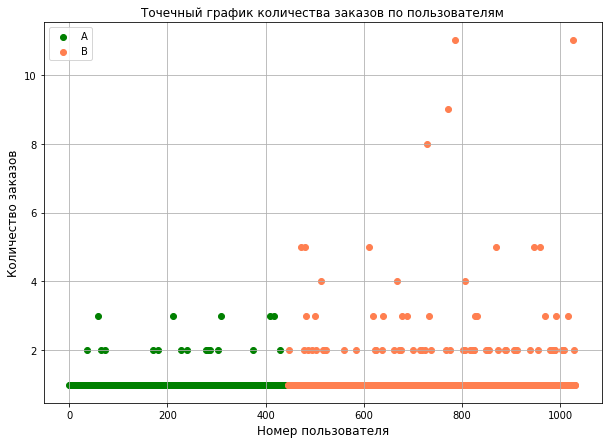

In [23]:
ordersGroup=orders.groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique,'group':'max'})
plt.figure(figsize=(10,7))
x_values1=pd.Series(range(0,len(ordersGroup[ordersGroup['group']=='A'])))
x_values2=pd.Series(range(len(ordersGroup[ordersGroup['group']=='A']),len(ordersGroup)))
plt.scatter(x_values1,ordersGroup[ordersGroup['group']=='A']['transactionId'],color='green',label='A');
plt.scatter(x_values2,ordersGroup[ordersGroup['group']=='B']['transactionId'],color='coral',label='B');
plt.grid()
plt.xlabel('Номер пользователя', fontsize='large')
plt.ylabel('Количество заказов', fontsize='large')
plt.title('Точечный график количества заказов по пользователям', fontsize='large')
plt.legend()
plt.show()

In [24]:
np.percentile(ordersGroup['transactionId'],[90,95,99])

array([1., 2., 4.])

В основном покупатели совершают не более 2 покупок, проведем отсечение по этому значению

### Точечный график стоимостей заказов. <a name="2.8"></a>

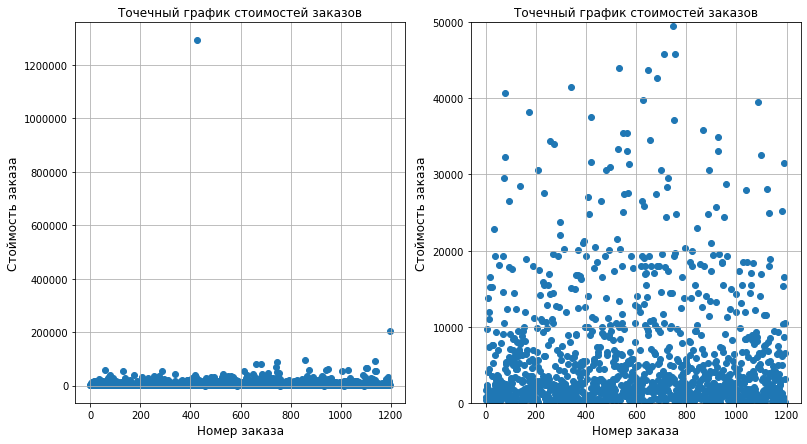

In [25]:
plt.figure(figsize=(13,7))
plt.subplot(1,2,1)
x_values=pd.Series(range(0,len(orders)))
plt.scatter(x_values,orders['revenue'])
plt.grid()
plt.xlabel('Номер заказа', fontsize='large')
plt.ylabel('Стоймость заказа', fontsize='large')
plt.title('Точечный график стоимостей заказов', fontsize='large')
plt.subplot(1,2,2)
x_values=pd.Series(range(0,len(orders)))
plt.scatter(x_values,orders['revenue'])
plt.grid()
plt.xlabel('Номер заказа', fontsize='large')
plt.ylabel('Стоймость заказа', fontsize='large')
plt.title('Точечный график стоимостей заказов', fontsize='large')
plt.ylim([0,50000])
plt.show()

In [26]:
np.percentile(orders['revenue'],[90,95,99])

array([18168. , 28000. , 58233.2])

Основная часть покупок находится у оси 'x'. Произведем отсечение заказов по 28000

###  Статистическая значимость различий в конверсии между группами по «сырым» данным <a name="2.9"></a>

*Нулевая гипотеза* : Статистически значимых различий в конверсии между группами A и B по сырым данным нет.  
*Альтернативная гипотеза* : Статистически значимые различия в конверсии между группами A и B по сырым данным есть.  
alpha=0.05

Выделим пользователей с аномальными заказами и количеством покупок

In [27]:
usersWithManyOrders=ordersGroup[ordersGroup['transactionId']>2]['visitorId']
usersWithExpensiveOrders=orders[orders['revenue']>28000]['visitorId'].drop_duplicates()

Построим статистическую значимость различий в конверсии между группами по "сырым данным"

In [28]:
visitorsDaylyA=visitors[visitors['group']=='A'][['date','visitors']]
visitorsDaylyA.columns=['date','visitorsPerDateA']
visitorsDaylyB=visitors[visitors['group']=='B'][['date','visitors']]
visitorsDaylyB.columns=['date','visitorsPerDateB']


In [29]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
alpha=0.05
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA=pd.concat([ordersByUsersA['orders'], pd.Series(0,index=
        np.arange(0,visitorsDaylyA['visitorsPerDateA'].sum()
                  -len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,
        index=np.arange(visitorsDaylyB['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [30]:
print("Статистическую значимость: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Разница между сегментами: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

Статистическую значимость: 0.008
Разница между сегментами: 0.138


Наблюдается статистическая значимость различий меньше 5 процентов.Принимаем альтернативную гипотезу. Статистический выигрыш B равен 14 процентов

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.
<a name="2.10"></a>

*Нулевая гипотеза* : Статистически значимых различий в среднем чеке между группами A и B по сырым данным нет.  
*Альтернативная гипотеза* : Статистически значимые различия в среднем чеке между группами A и B по сырым данным есть.  
alpha=0.05

In [31]:
print("Статистическую значимость: {0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print("Разница между сегментами: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)) 

Статистическую значимость: 0.365
Разница между сегментами: 0.259


Наблюдается статистическая значимость различий больше 5 процентов. Не можем отвергнуть гипотезу, что различий в среднем чеке между группами нет. Статистический выигрышь B равен 26 процентам.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным
<a name="2.11"></a>

*Нулевая гипотеза* : Статистически значимых различий в конверсии между группами A и B по очищенным данным нет.  
*Альтернативная гипотеза* : Статистически значимые различия в конверсии между группами A и B по очищенным данным есть.  
alpha=0.05

In [32]:
abnormalUsers=pd.concat([usersWithExpensiveOrders,usersWithManyOrders],axis=0).drop_duplicates()
sampleAFiltered=pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(0,visitorsDaylyA['visitorsPerDateA'].sum()
                  -len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered=pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(
    0, index=np.arange(0,visitorsDaylyB['visitorsPerDateB'].sum()
                  -len(ordersByUsersB['orders'])),name='orders')],axis=0)

In [33]:
print("Статистическую значимость: {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Разница между сегментами: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Статистическую значимость: 0.006
Разница между сегментами: 0.176


После очистки данных статистическая значимасть еще уменьшилась, а разница в сегментах увеличилась до 17.6%. Группа B сильно выигрывает по конверсии

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.
<a name="2.12"></a>

*Нулевая гипотеза* : Статистически значимых различий в среднем чеке между группами A и B по очищенным данным нет.  
*Альтернативная гипотеза* : Статистически значимые различия в среднем чеке между группами A и B по очищенным данным есть.  
alpha=0.05

In [34]:
print("Статистическую значимость: {0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Разница между сегментами:{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

Статистическую значимость: 0.376
Разница между сегментами:-0.022


P-value увеличилось до 37.6%, а разница в среднем чеке после очистки оказалась на стороне A: 2%

## Вывод проекта
<a name ='3'></a>

### По части 1.
С помощью метрик ICE и RICE мы попробовали выявить самые приоритетные гипотезы. По этим метрикам ими стали: 7. Добавить форму подписки на все основные страницы и 0. Добавить два новых канала привлечения трафика.

In [35]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


### По части 2.


Построили и проанализировали необходимые <a href='#graph'>графики</a>. На них мы заметили выбросы. Очистили данные по количеству и размеру покупок. 

Графики относительных величин до очистки данных


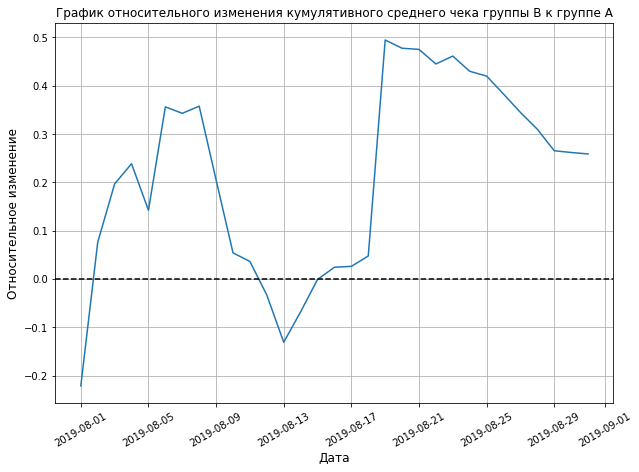

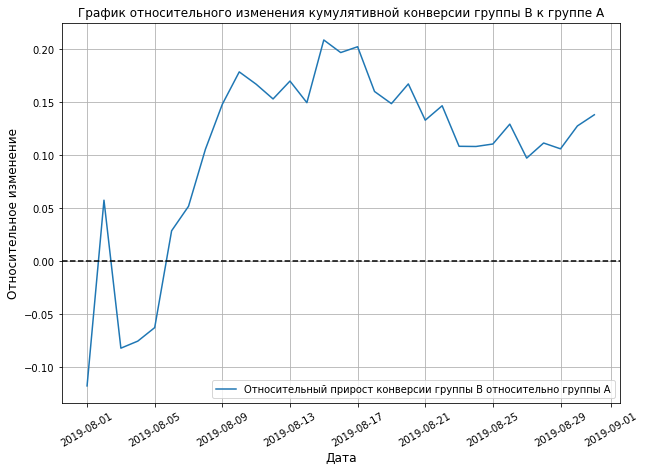

In [36]:
print('Графики относительных величин до очистки данных')
display(grotizmsrch)
display(grotizmcum)


После очистки данных мы получили следующие величины, для статистической значимости различий в конверсии между группами:  
- Статистическую значимость: 0.006
- Разница между сегментами: 0.176 

Для статистической значимости различий в среднем чеке заказа между группами:
- Статистическую значимость: 0.376
- Разница между сегментами:-0.022

Статистически значимые различия в конверсии между группами A и B по очищенным данным есть. Группа B выигрывает по конверсии на 17.6%. Мы не смогли отвергнуть гипотезу, что различий в среднем чеке между группами нет. Группа A выигрывает по конверсии на 2%.Мне бы рекомендовал завершить тест, так как данные с 13 августа уже стабилизировались, а группа B побеждает по конверсии с большим отрывом